In [1]:
import geopandas as gpd
import os

In [2]:
if os.path.exists("covid.geojson"):
    print("have a file")
    df = gpd.read_file("covid.geojson")
else:
    print("download it")
    df = gpd.read_file("https://dhsgis.wi.gov/server/rest/services/DHS_COVID19/COVID19_WI_V2/MapServer/9/query?outFields=*&where=1%3D1&f=geojson")
    df.to_file("covid.geojson")

have a file


In [3]:
print(df.columns)
df.head()

Index(['RptDt', 'GEOID', 'GEOName', 'POS_CUM_CP', 'POS_NEW_CP',
       'POS_7DAYAVG_CP', 'DTH_CUM_CP', 'DTH_NEW_CP', 'DTH_7DAYAVG_CP',
       'DTH_OVER_30DAYS_CP', 'DTH_CP_Daily', 'TESTS_POS_CONF',
       'TESTS_POS_CONF_NEW', 'TESTS_POS_CONF_7DAYAVG', 'PercentNAATPos',
       'TESTS_CUM', 'TESTS_NEW', 'TESTS_7DAYAVG', 'POS_CUM_CONF',
       'POS_NEW_CONF', 'POS_7DAYAVG_CONF', 'POS_CUM_PROB', 'POS_NEW_PROB',
       'POS_7DAYAVG_PROB', 'DTH_CUM_CONF', 'DTH_NEW_CONF', 'DTH_7DAYAVG_CONF',
       'DTH_CONF_Daily', 'DTH_CUM_PROB', 'DTH_NEW_PROB', 'DTH_7DAYAVG_PROB',
       'DTH_PROB_Daily', 'POS_MALE_CP', 'POS_FEM_CP', 'POS_OTH_CP',
       'POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP', 'POS_30_39_CP',
       'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP', 'POS_70_79_CP',
       'POS_80_89_CP', 'POS_90_CP', 'DTHS_FEM_CP', 'DTHS_MALE_CP',
       'DTHS_OTH_CP', 'DTHS_0_9_CP', 'DTHS_10_19_CP', 'DTHS_20_29_CP',
       'DTHS_30_39_CP', 'DTHS_40_49_CP', 'DTHS_50_59_CP', 'DTHS_60_69_CP',
       'DTH

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,Shape.STArea(),Shape.STLength(),geometry
0,1668024000000,55001950100,None,978,1,0.57,13,0,0.0,0,...,573,357,1667887200000,2870,66.0,1156,Census tract,4.894706e+08,108089.745033,"POLYGON ((-89.72475 44.24769, -89.72492 44.247..."
1,1668024000000,55001950201,None,342,0,0.00,5,0,0.0,0,...,152,167,1667887200000,1244,96.0,1157,Census tract,2.277343e+08,97033.719846,"POLYGON ((-89.73892 43.98186, -89.73925 43.982..."
2,1668024000000,55001950202,None,628,2,0.86,7,0,0.0,0,...,352,257,1667887200000,2599,146.0,1158,Census tract,1.004937e+09,162456.681081,"POLYGON ((-89.90890 44.17627, -89.90907 44.176..."
3,1668024000000,55001950400,None,1349,1,0.57,25,0,0.0,0,...,638,635,1667887200000,4533,183.0,1159,Census tract,4.567996e+08,121861.166562,"POLYGON ((-89.73892 43.98186, -89.75025 43.981..."
4,1668024000000,55001950501,None,386,0,0.00,0,0,0.0,0,...,153,216,1667887200000,1603,133.0,1160,Census tract,2.575669e+08,77494.089221,"POLYGON ((-89.93773 43.96630, -89.93779 43.966..."


<AxesSubplot:>

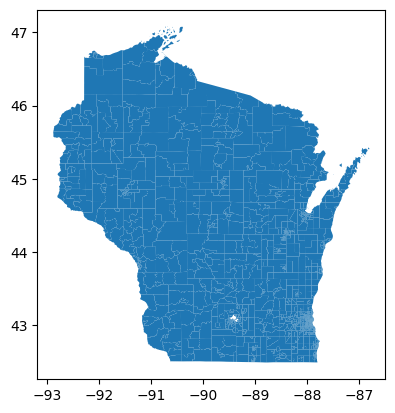

In [4]:
df.plot()

In [5]:
# How can we get a clean dataset of COVID deaths in WI?

In [6]:
# TODO: communicate in final results what percent of values were guessed (imputed)
df = df.replace(-999, 2) # 2 is between 0-4

<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

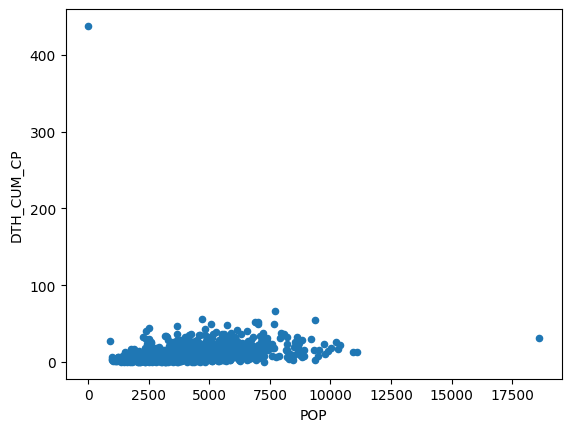

In [7]:
df.plot.scatter(x="POP", y="DTH_CUM_CP")

In [8]:
df[df["DTH_CUM_CP"] > 300]

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,Shape.STArea(),Shape.STLength(),geometry
1392,1668024000000,TRACT N/A,None,48333,40,33.71,438,0,0.0,0,...,21173,25324,1667887200000,0,NaN,2235,Census tract,466.180086,80.071546,"POLYGON ((-87.04159 44.13490, -87.04161 44.134..."


In [9]:
df["GEOID"].str.fullmatch(r"\d+").value_counts()

True     1392
False       1
Name: GEOID, dtype: int64

<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

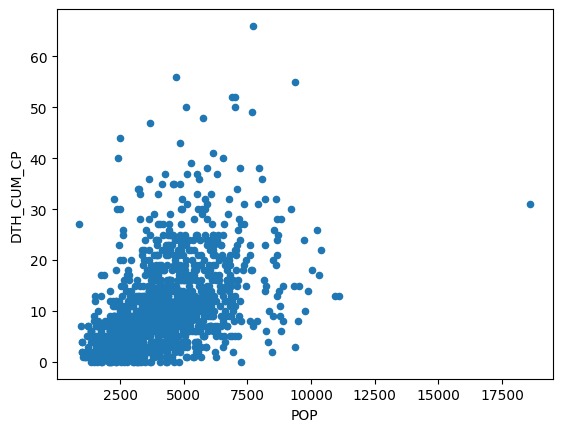

In [10]:
df = df[df["GEOID"].str.fullmatch(r"\d+")]
df.plot.scatter(x="POP", y="DTH_CUM_CP")

In [11]:
# How can we train/fit models to known data to predict unknowns?
# Population => Deaths, Cases => Deaths, Cases by Age => Deaths

In [12]:
# model = ????
# model.fit(X, y)
# y = model.predict(X)

In [13]:
df[["POP"]].head()

,POP
0,2870
1,1244
2,2599
3,4533
4,1603


In [14]:
df["DTH_CUM_CP"].head()

0    13
1     5
2     7
3    25
4     0
Name: DTH_CUM_CP, dtype: int64

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[["POP"]], df["DTH_CUM_CP"])
y = model.predict(df[["POP"]]) # TODO: use x values for new places

In [16]:
# hypothetical census tracts -- what is the predicted death count?
import pandas as pd
predict_df = pd.DataFrame({"POP": [1000,2000,3000]})
predict_df["predicted deaths"] = model.predict(predict_df)
predict_df

,POP,predicted deaths
0,1000,3.794165
1,2000,6.026414
2,3000,8.258662


<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

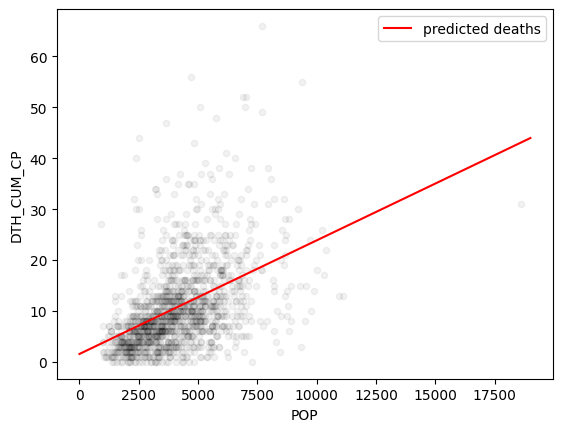

In [17]:
# How can we visualize model predictions?
predict_df = pd.DataFrame({"POP": range(0, 20000, 1000)})
predict_df["predicted deaths"] = model.predict(predict_df)
ax = predict_df.plot.line(x="POP", y="predicted deaths", color="r")
df.plot.scatter(x="POP", y="DTH_CUM_CP", ax=ax, color="k", alpha=0.05)

In [18]:
# How can we get a formula for the relationship?

In [19]:
model.coef_

array([0.00223225])

In [20]:
model.coef_[0] # slope of the line

0.002232248762253651

In [21]:
model.intercept_

1.561916052935402

In [22]:
print(f"deaths ~= {round(model.coef_[0], 4)} * population + {round(model.intercept_, 4)}")

deaths ~= 0.0022 * population + 1.5619


In [23]:
# How well does our model fit the data?
# R^2 ("r squared"), explained variance

In [24]:
before = df["DTH_CUM_CP"].var()
before

73.5585656354066

In [25]:
predictions = model.predict(df[["POP"]])

In [26]:
after1 = (df["DTH_CUM_CP"] - predictions).var()   # explained_variance_score (sklearn)
after1

58.36158186387133

In [27]:
after2 = ((df["DTH_CUM_CP"] - predictions) ** 2).mean() # r2_score (sklearn)
after2

58.31965544011855

In [28]:
improvement = before - after1
improvement / before

0.20659706507681502

In [29]:
improvement = before - after2
improvement / before

0.2071670384496046

In [30]:
# the R^2 score
model.score(df[["POP"]], df["DTH_CUM_CP"])    # it will .predict() y based on X, compare to real y

0.20659706507681497

In [31]:
# Did our model learn, or just memorize (that is, "overfit")?
len(df) // 2

696

In [32]:
train = df.iloc[:len(df)//2]  # the first half of the rows

In [33]:
test = df.iloc[len(df)//2:]  # the second half of the rows

In [34]:
train, test = df.iloc[:len(df)//2], df.iloc[len(df)//2:]
len(train), len(test)

(696, 696)

In [35]:
from sklearn.model_selection import train_test_split # shuffle, then split

train, test = train_test_split(df, test_size=0.25)
len(train), len(test)

(1044, 348)

In [36]:
model = LinearRegression()
xcols = ["POP"]
ycol = "DTH_CUM_CP"

model.fit(train[xcols], train[ycol])
#y = model.predict(test[xcols])
model.score(test[xcols], test[ycol])

0.26323842779472495

In [37]:
# How can we minimize noise due to random train/test splits?
from sklearn.model_selection import cross_val_score

In [38]:
# do many different train/test splits of the values, fitting
# and scoring the model across each combination
model = LinearRegression()
scores = cross_val_score(model, train[xcols], train[ycol])
scores

array([0.15167071, 0.20519442, 0.21054739, 0.22587233, 0.10809512])

In [39]:
scores.mean()

0.1802759933114196

In [40]:
# How can we compare models?
# model 1: POP => DEATHS
# model 2: CASES => DEATHS

In [41]:
model1 = LinearRegression()
model2 = LinearRegression()
model1_scores = cross_val_score(model1, train[["POP"]], train[ycol])
model2_scores = cross_val_score(model2, train[["POS_CUM_CP"]], train[ycol])

In [42]:
err = pd.Series({"model1": model1_scores.std(),
                   "model2": model2_scores.std(),})
err

model1    0.043920
model2    0.039678
dtype: float64

<AxesSubplot:>

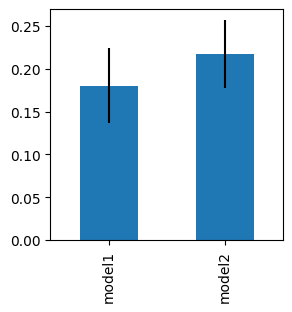

In [43]:
means = pd.Series({"model1": model1_scores.mean(),
                   "model2": model2_scores.mean(),})
means.plot.bar(figsize=(3,3), yerr=err)
# TODO: pick a winner, run it one more time against the test data

In [44]:
# How can we use multiple x variables (multiple regression)?
model = LinearRegression()
xcols = ['POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP', 'POS_30_39_CP',
       'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP', 'POS_70_79_CP',
       'POS_80_89_CP', 'POS_90_CP']
ycol = "DTH_CUM_CP"

model.fit(train[xcols], train[ycol])
model.score(test[xcols], test[ycol]) # .predict on X values, then compare predicted y values to actual y vals (r2_score)

0.612502968846914

In [48]:
# How can we interpret what features the model is relying on?
model.coef_

array([-3.14424767e-02,  3.19603985e-05, -6.66670727e-04,  1.48477020e-02,
        1.06632178e-02, -4.01242448e-03,  8.02119861e-03, -3.04084681e-03,
        1.56718566e-01,  1.89015037e-01])

<AxesSubplot:>

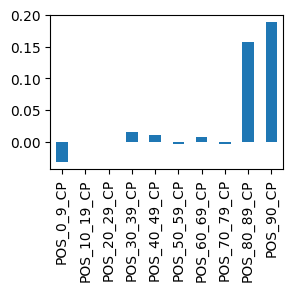

In [52]:
pd.Series(model.coef_, index=xcols).plot.bar(figsize=(3,2))